In [1]:
# to perform the final model

In [2]:
import pandas as pd
import numpy as np

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder

In [5]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore') # to  avoid the error

In [6]:
df1 = pd.read_csv('pizza_sales.csv')

In [7]:
df1.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


DATA Cleaning

In [8]:
df1.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [10]:
df1.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48613.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821494
std,14035.529381,6180.119770,0.143077,3.621789,4.437520
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [11]:
len(df1.columns)

12

In [13]:
df2 = pd.read_csv('Pizza_ingredients.csv')

In [14]:
df2.head()

,pizza_name_id,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,bbq_ckn_l,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,bbq_ckn_l,The Barbecue Chicken Pizza,Red Peppers,15.0
2,bbq_ckn_l,The Barbecue Chicken Pizza,Green Peppers,20.0
3,bbq_ckn_l,The Barbecue Chicken Pizza,Tomatoes,30.0
4,bbq_ckn_l,The Barbecue Chicken Pizza,Red Onions,60.0


In [15]:
df2.columns

Index(['pizza_name_id', 'pizza_name', 'pizza_ingredients',
       'Items_Qty_In_Grams'],
      dtype='object')

In [16]:
df2.shape

(518, 4)

In [17]:
df1.dropna(inplace = True)

In [18]:
df1.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

PROCESS THE DATE AND  TIME

In [20]:
def parse_dates(date):
  for fmt in ('%d-%m-%Y', '%d/%m/%Y'):
    try:
      return pd.to_datetime(date, format=fmt)
    except ValueError:
      pass
  raise ValueError(f'no valid date format found for {date}')

In [21]:
df1['order_date'] = df1['order_date'].apply(parse_dates)

In [22]:
df1.order_date

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
48615   2015-12-31
48616   2015-12-31
48617   2015-12-31
48618   2015-12-31
48619   2015-12-31
Name: order_date, Length: 48554, dtype: datetime64[ns]

In [23]:
df1.pizza_name.unique()

array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Calabrese Pizza', 'The Four Cheese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Napolitana Pizza', 'The Sicilian Pizza',
       'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Soppressata Pizza', 'The Brie Carre Pizza'

In [24]:
len(df1.pizza_name.unique())

32

Aggregate Data

In [27]:
sales_group = df1.groupby(['order_date', 'pizza_name']).sum().reset_index()

In [28]:
sales_group

,order_date,pizza_name,pizza_id,order_id,pizza_name_id,quantity,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients
0,2015-01-01,The Barbecue Chicken Pizza,963,397,bbq_ckn_sbbq_ckn_lbbq_ckn_lbbq_ckn_mbbq_ckn_lb...,11,12:29:3613:02:5913:53:0014:23:0115:11:1715:54:...,204.25,204.25,SLLMLLMLMML,ChickenChickenChickenChickenChickenChickenChic...,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,2015-01-01,The Big Meat Pizza,422,173,big_meat_sbig_meat_sbig_meat_sbig_meat_sbig_me...,5,13:33:0014:03:0815:53:1817:28:0920:52:08,60.00,60.00,SSSSS,ClassicClassicClassicClassicClassic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
2,2015-01-01,The Calabrese Pizza,44,17,calabrese_m,1,13:53:00,16.25,16.25,M,Supreme,"?duja Salami, Pancetta, Tomatoes, Red Onions, ..."
3,2015-01-01,The California Chicken Pizza,116,46,cali_ckn_lcali_ckn_mcali_ckn_lcali_ckn_s,4,13:02:5913:02:5913:04:4113:04:41,71.00,71.00,LMLS,ChickenChickenChickenChicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,2015-01-01,The Chicken Alfredo Pizza,179,71,ckn_alfredo_sckn_alfredo_m,2,15:35:4617:38:34,29.50,29.50,SM,ChickenChicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
...,...,...,...,...,...,...,...,...,...,...,...,...
11025,2015-12-31,The Spinach Pesto Pizza,194127,85246,spin_pesto_sspin_pesto_lspin_pesto_lspin_pesto_m,5,12:41:3716:30:3417:22:0820:44:43,70.50,83.00,SLLM,VeggieVeggieVeggieVeggie,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat..."
11026,2015-12-31,The Spinach Supreme Pizza,97060,42617,spinach_supr_mspinach_supr_m,2,16:44:3516:46:41,33.00,33.00,MM,SupremeSupreme,"Spinach, Red Onions, Pepperoni, Tomatoes, Arti..."
11027,2015-12-31,The Spinach and Feta Pizza,242744,106592,spinach_fet_sspinach_fet_lspinach_fet_sspinach...,5,13:04:1817:53:1418:37:2019:05:0419:06:29,72.25,72.25,SLSSM,VeggieVeggieVeggieVeggieVeggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
11028,2015-12-31,The Thai Chicken Pizza,145580,63927,thai_ckn_mthai_ckn_mthai_ckn_l,3,15:28:0716:31:1618:37:20,54.25,54.25,MML,ChickenChickenChicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."


In [30]:
sales_group.head()

,order_date,pizza_name,pizza_id,order_id,pizza_name_id,quantity,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients
0,2015-01-01,The Barbecue Chicken Pizza,963,397,bbq_ckn_sbbq_ckn_lbbq_ckn_lbbq_ckn_mbbq_ckn_lb...,11,12:29:3613:02:5913:53:0014:23:0115:11:1715:54:...,204.25,204.25,SLLMLLMLMML,ChickenChickenChickenChickenChickenChickenChic...,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,2015-01-01,The Big Meat Pizza,422,173,big_meat_sbig_meat_sbig_meat_sbig_meat_sbig_me...,5,13:33:0014:03:0815:53:1817:28:0920:52:08,60.00,60.00,SSSSS,ClassicClassicClassicClassicClassic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
2,2015-01-01,The Calabrese Pizza,44,17,calabrese_m,1,13:53:00,16.25,16.25,M,Supreme,"?duja Salami, Pancetta, Tomatoes, Red Onions, ..."
3,2015-01-01,The California Chicken Pizza,116,46,cali_ckn_lcali_ckn_mcali_ckn_lcali_ckn_s,4,13:02:5913:02:5913:04:4113:04:41,71.00,71.00,LMLS,ChickenChickenChickenChicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,2015-01-01,The Chicken Alfredo Pizza,179,71,ckn_alfredo_sckn_alfredo_m,2,15:35:4617:38:34,29.50,29.50,SM,ChickenChicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."


In [31]:
# reshape data for time series modeling
sales_pivot = sales_group.pivot(index='order_date', columns='pizza_name', values='quantity').fillna(0)

In [32]:
sales_pivot

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.0,5.0,0.0,1.0,4.0,2.0,4.0,10.0,6.0,5.0,...,4.0,4.0,0.0,7.0,5.0,2.0,5.0,2.0,7.0,3.0
2015-01-02,8.0,8.0,0.0,0.0,5.0,1.0,2.0,6.0,6.0,3.0,...,4.0,6.0,4.0,6.0,11.0,2.0,7.0,4.0,9.0,5.0
2015-01-03,7.0,8.0,0.0,1.0,11.0,5.0,3.0,5.0,4.0,7.0,...,7.0,6.0,1.0,5.0,4.0,3.0,2.0,2.0,9.0,7.0
2015-01-04,9.0,0.0,2.0,2.0,5.0,4.0,1.0,4.0,2.0,4.0,...,4.0,3.0,0.0,1.0,4.0,3.0,4.0,3.0,5.0,1.0
2015-01-05,2.0,3.0,2.0,0.0,6.0,8.0,2.0,9.0,5.0,4.0,...,2.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,4.0,5.0,1.0,1.0,3.0,0.0,3.0,8.0,2.0,4.0,...,1.0,4.0,1.0,2.0,4.0,3.0,1.0,1.0,5.0,9.0
2015-12-28,2.0,3.0,1.0,1.0,5.0,2.0,3.0,9.0,2.0,4.0,...,5.0,4.0,5.0,3.0,2.0,2.0,2.0,3.0,6.0,3.0
2015-12-29,4.0,6.0,1.0,2.0,6.0,1.0,1.0,3.0,3.0,3.0,...,3.0,2.0,3.0,1.0,3.0,4.0,0.0,1.0,5.0,1.0


In [34]:
sales_pivot.head()

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
order_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,11.0,5.0,0.0,1.0,4.0,2.0,4.0,10.0,6.0,5.0,...,4.0,4.0,0.0,7.0,5.0,2.0,5.0,2.0,7.0,3.0
2015-01-02,8.0,8.0,0.0,0.0,5.0,1.0,2.0,6.0,6.0,3.0,...,4.0,6.0,4.0,6.0,11.0,2.0,7.0,4.0,9.0,5.0
2015-01-03,7.0,8.0,0.0,1.0,11.0,5.0,3.0,5.0,4.0,7.0,...,7.0,6.0,1.0,5.0,4.0,3.0,2.0,2.0,9.0,7.0
2015-01-04,9.0,0.0,2.0,2.0,5.0,4.0,1.0,4.0,2.0,4.0,...,4.0,3.0,0.0,1.0,4.0,3.0,4.0,3.0,5.0,1.0
2015-01-05,2.0,3.0,2.0,0.0,6.0,8.0,2.0,9.0,5.0,4.0,...,2.0,5.0,2.0,3.0,2.0,4.0,2.0,2.0,6.0,2.0


In [35]:
sales_pivot.columns

Index(['The Barbecue Chicken Pizza', 'The Big Meat Pizza',
       'The Brie Carre Pizza', 'The Calabrese Pizza',
       'The California Chicken Pizza', 'The Chicken Alfredo Pizza',
       'The Chicken Pesto Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Four Cheese Pizza', 'The Greek Pizza',
       'The Green Garden Pizza', 'The Hawaiian Pizza',
       'The Italian Capocollo Pizza', 'The Italian Supreme Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Mexicana Pizza', 'The Napolitana Pizza', 'The Pepper Salami Pizza',
       'The Pepperoni Pizza', 'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Prosciutto and Arugula Pizza', 'The Sicilian Pizza',
       'The Soppressata Pizza', 'The Southwest Chicken Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Spinach Supreme Pizza', 'The Spinach and Feta Pizza',
       'The Thai Chicken Pizza', 'The Vegetables + Vegetables Pizza'],
      dtype

In [36]:
# ARIMA MODEL

In [37]:
arima_models = {}

for pizza_name in sales_pivot.columns:
  try:
    model = ARIMA(sales_pivot[pizza_name], order=(1, 1, 0))
    model_fit = model.fit()
    arima_models[pizza_name] = model_fit
  except:
    print(f'ARIMA model for {pizza_name} failed to fit')

In [38]:
pred_days = 7
pred_arima = {}
for pizza_name, model in arima_models.items():
  pred_arima[pizza_name] = model.predict(start=len(sales_pivot), end=len(sales_pivot) + pred_days - 1)

In [40]:
predictions_df = pd.DataFrame(pred_arima)
predictions_df # future 7 days prediction

,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
358,7.949231,4.420315,0.868806,1.368239,7.0,2.515974,2.139860,6.884102,3.032327,6.974960,...,3.594000,2.583928,2.060907,5.917019,5.844288,3.542421,2.0,3.173030,3.0,7.773728
359,9.000644,5.252117,1.508606,2.255787,7.0,3.250085,3.004890,8.502239,4.000261,8.000157,...,4.252945,3.751409,2.501855,5.496557,7.266934,4.250600,2.0,4.007485,3.0,8.764985
360,8.461593,4.814122,1.146737,1.773032,7.0,2.886938,2.602621,7.661914,3.524117,7.481141,...,3.944120,3.187265,2.294809,5.689343,6.625582,3.906524,2.0,3.626354,3.0,8.323624
361,8.737960,5.044753,1.351409,2.035612,7.0,3.066578,2.789690,8.098308,3.758341,7.743898,...,4.088856,3.459867,2.392027,5.600949,6.914714,4.073697,2.0,3.800433,3.0,8.520142
362,8.596269,4.923311,1.235647,1.892789,7.0,2.977715,2.702696,7.871682,3.643122,7.610875,...,4.021023,3.328142,2.346379,5.641478,6.784369,3.992474,2.0,3.720923,3.0,8.432641
363,8.668913,4.987258,1.301122,1.970474,7.0,3.021673,2.743152,7.989373,3.699800,7.678219,...,4.052814,3.391794,2.367813,5.622895,6.843130,4.031937,2.0,3.757239,3.0,8.471601
364,8.631669,4.953586,1.264089,1.928219,7.0,2.999928,2.724338,7.928254,3.671919,7.644125,...,4.037915,3.361036,2.357748,5.631416,6.816640,4.012764,2.0,3.740652,3.0,8.454254


In [41]:
predictions_df.columns

Index(['The Barbecue Chicken Pizza', 'The Big Meat Pizza',
       'The Brie Carre Pizza', 'The Calabrese Pizza',
       'The California Chicken Pizza', 'The Chicken Alfredo Pizza',
       'The Chicken Pesto Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Four Cheese Pizza', 'The Greek Pizza',
       'The Green Garden Pizza', 'The Hawaiian Pizza',
       'The Italian Capocollo Pizza', 'The Italian Supreme Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Mexicana Pizza', 'The Napolitana Pizza', 'The Pepper Salami Pizza',
       'The Pepperoni Pizza', 'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Prosciutto and Arugula Pizza', 'The Sicilian Pizza',
       'The Soppressata Pizza', 'The Southwest Chicken Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Spinach Supreme Pizza', 'The Spinach and Feta Pizza',
       'The Thai Chicken Pizza', 'The Vegetables + Vegetables Pizza'],
      dtype

In [49]:
predictions_df.index = pd.date_range(start=sales_pivot.index[-1], periods=pred_days, freq='D')

In [51]:
predictions_df

,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
2015-12-31,7.949231,4.420315,0.868806,1.368239,7.0,2.515974,2.139860,6.884102,3.032327,6.974960,...,3.594000,2.583928,2.060907,5.917019,5.844288,3.542421,2.0,3.173030,3.0,7.773728
2016-01-01,9.000644,5.252117,1.508606,2.255787,7.0,3.250085,3.004890,8.502239,4.000261,8.000157,...,4.252945,3.751409,2.501855,5.496557,7.266934,4.250600,2.0,4.007485,3.0,8.764985
2016-01-02,8.461593,4.814122,1.146737,1.773032,7.0,2.886938,2.602621,7.661914,3.524117,7.481141,...,3.944120,3.187265,2.294809,5.689343,6.625582,3.906524,2.0,3.626354,3.0,8.323624
2016-01-03,8.737960,5.044753,1.351409,2.035612,7.0,3.066578,2.789690,8.098308,3.758341,7.743898,...,4.088856,3.459867,2.392027,5.600949,6.914714,4.073697,2.0,3.800433,3.0,8.520142
2016-01-04,8.596269,4.923311,1.235647,1.892789,7.0,2.977715,2.702696,7.871682,3.643122,7.610875,...,4.021023,3.328142,2.346379,5.641478,6.784369,3.992474,2.0,3.720923,3.0,8.432641
2016-01-05,8.668913,4.987258,1.301122,1.970474,7.0,3.021673,2.743152,7.989373,3.699800,7.678219,...,4.052814,3.391794,2.367813,5.622895,6.843130,4.031937,2.0,3.757239,3.0,8.471601
2016-01-06,8.631669,4.953586,1.264089,1.928219,7.0,2.999928,2.724338,7.928254,3.671919,7.644125,...,4.037915,3.361036,2.357748,5.631416,6.816640,4.012764,2.0,3.740652,3.0,8.454254


In [52]:
# the above the table will be used to predict the after  7 days 

In [56]:
# Ingredients_dataset

In [57]:
ingred_df = df2[['pizza_name', 'pizza_ingredients', 'Items_Qty_In_Grams']]

In [58]:
ingred_df.head()

,pizza_name,pizza_ingredients,Items_Qty_In_Grams
0,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,The Barbecue Chicken Pizza,Red Peppers,15.0
2,The Barbecue Chicken Pizza,Green Peppers,20.0
3,The Barbecue Chicken Pizza,Tomatoes,30.0
4,The Barbecue Chicken Pizza,Red Onions,60.0


In [59]:
ingred_df.shape

(518, 3)

In [60]:
# change column name to items_qty
ingred_df.rename(columns={'Items_Qty_In_Grams': 'items_qty'}, inplace=True)

In [61]:
ingred_df.columns #  columns will be changed

Index(['pizza_name', 'pizza_ingredients', 'items_qty'], dtype='object')

In [62]:
predictions_df # 7 days prediction values

,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
2015-12-31,7.949231,4.420315,0.868806,1.368239,7.0,2.515974,2.139860,6.884102,3.032327,6.974960,...,3.594000,2.583928,2.060907,5.917019,5.844288,3.542421,2.0,3.173030,3.0,7.773728
2016-01-01,9.000644,5.252117,1.508606,2.255787,7.0,3.250085,3.004890,8.502239,4.000261,8.000157,...,4.252945,3.751409,2.501855,5.496557,7.266934,4.250600,2.0,4.007485,3.0,8.764985
2016-01-02,8.461593,4.814122,1.146737,1.773032,7.0,2.886938,2.602621,7.661914,3.524117,7.481141,...,3.944120,3.187265,2.294809,5.689343,6.625582,3.906524,2.0,3.626354,3.0,8.323624
2016-01-03,8.737960,5.044753,1.351409,2.035612,7.0,3.066578,2.789690,8.098308,3.758341,7.743898,...,4.088856,3.459867,2.392027,5.600949,6.914714,4.073697,2.0,3.800433,3.0,8.520142
2016-01-04,8.596269,4.923311,1.235647,1.892789,7.0,2.977715,2.702696,7.871682,3.643122,7.610875,...,4.021023,3.328142,2.346379,5.641478,6.784369,3.992474,2.0,3.720923,3.0,8.432641
2016-01-05,8.668913,4.987258,1.301122,1.970474,7.0,3.021673,2.743152,7.989373,3.699800,7.678219,...,4.052814,3.391794,2.367813,5.622895,6.843130,4.031937,2.0,3.757239,3.0,8.471601
2016-01-06,8.631669,4.953586,1.264089,1.928219,7.0,2.999928,2.724338,7.928254,3.671919,7.644125,...,4.037915,3.361036,2.357748,5.631416,6.816640,4.012764,2.0,3.740652,3.0,8.454254


In [63]:
ingred_df.head()

,pizza_name,pizza_ingredients,items_qty
0,The Barbecue Chicken Pizza,Barbecued Chicken,40.0
1,The Barbecue Chicken Pizza,Red Peppers,15.0
2,The Barbecue Chicken Pizza,Green Peppers,20.0
3,The Barbecue Chicken Pizza,Tomatoes,30.0
4,The Barbecue Chicken Pizza,Red Onions,60.0


In [64]:
## Logic of the final model

In [65]:

# Create a dictionary to store the ingredient quantities
ingredient_quantities = {}

# Iterate through each pizza in the predictions
for pizza_name in predictions_df.columns:
  predicted_quantity = predictions_df[pizza_name].sum()
  pizza_ingredients = ingred_df[ingred_df['pizza_name'] == pizza_name]

  for index, row in pizza_ingredients.iterrows():
    ingredient = row['pizza_ingredients']
    ingredient_qty = row['items_qty']
    required_quantity = predicted_quantity * ingredient_qty
    if ingredient not in ingredient_quantities:
      ingredient_quantities[ingredient] = 0
    ingredient_quantities[ingredient] += required_quantity




In [66]:
# Create a DataFrame from the ingredient quantities
ingredient_requirements_df = pd.DataFrame.from_dict(ingredient_quantities, orient='index', columns=['required_quantity'])



In [67]:
ingredient_requirements_df  # find the requirements quality

,required_quantity
Barbecued Chicken,5404.165210
Red Peppers,11341.552000
Green Peppers,8030.393870
Tomatoes,34984.718345
Red Onions,54797.556520
...,...
Luganega Sausage,2767.612913
Onions,1383.806456
Soppressata Salami,4896.461505
Peperoncini verdi,1412.869705


In [68]:
ingredient_requirements_df.head()

,required_quantity
Barbecued Chicken,5404.165210
Red Peppers,11341.552000
Green Peppers,8030.393870
Tomatoes,34984.718345
Red Onions,54797.556520


In [69]:
ingredient_requirements_df.shape

(64, 1)

In [70]:


# Create a purchase order DataFrame
purchase_order_df = ingredient_requirements_df.copy()

# Add a column for the unit of measure (assuming all ingredients are in grams)
purchase_order_df['unit'] = 'grams'

# Rename the columns for better readability
purchase_order_df = purchase_order_df.rename(columns={'required_quantity': 'quantity'})

# Add a header to the purchase order
print('Purchase Order:')
print('----------------')

# Print the purchase order table
print(purchase_order_df.to_string())


Purchase Order:
----------------
                                quantity   unit
Barbecued Chicken            5404.165210  grams
Red Peppers                 11341.552000  grams
Green Peppers                8030.393870  grams
Tomatoes                    34984.718345  grams
Red Onions                  54797.556520  grams
Barbecue Sauce               1801.388403  grams
Bacon                       19992.004778  grams
Pepperoni                   24192.916443  grams
Italian Sausage               343.954622  grams
Chorizo Sausage              1719.773109  grams
Brie Carre Cheese             260.292443  grams
Prosciutto                    260.292443  grams
Caramelized Onions                   NaN  grams
Pears                          86.764148  grams
Thyme                          43.382074  grams
Garlic                      17939.075394  grams
?duja Salami                 1586.898271  grams
Pancetta                     2380.347406  grams
Friggitello Peppers           396.724568  grams
Chicken

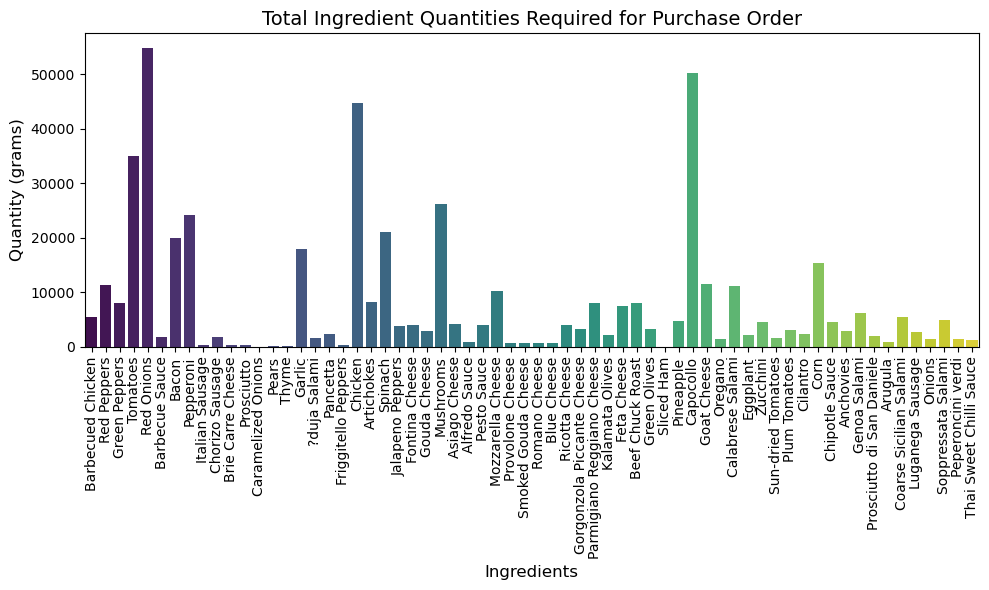

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot visualization of ingredient quantities
plt.figure(figsize=(10, 6))
sns.barplot(x=purchase_order_df.index, y=purchase_order_df['quantity'], palette='viridis')

# Adding labels and title
plt.title('Total Ingredient Quantities Required for Purchase Order', fontsize=14)
plt.xlabel('Ingredients', fontsize=12)
plt.ylabel('Quantity (grams)', fontsize=12)
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()
